In [1]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
import os

In [9]:
EXPERIMENT_VERSION = "08"
FOLDER_EXECUTIONS = f"../data/experiment_v{EXPERIMENT_VERSION}/cross_platform/executions"
FOLDER_DETECTOR = f"../data/experiment_v{EXPERIMENT_VERSION}/cross_platform/predictions/ks"

In [6]:
config = load_config_and_check(f"../config/experiment_v{EXPERIMENT_VERSION}.yaml")

In [7]:
# scan the folders with executions 
# prepare all the possible pairs of comparisons

# get all the pairs refering to the same program_ID and from two different 
# platforms

# group the pairs per program_ID and yield the group

# so that the detector can analyze all the pairs in the same group and save a 
# single json refering to the same program_ID


In [8]:
def read_execution_folder(folder_with_execs, compiler_name):
    """Parse execution folder: info on the program_id and execution."""
    files = os.listdir(os.path.join(folder_with_execs, compiler_name))
    records = []
    for filename in files:
        new_record = {}
        new_record["compiler_name"] = compiler_name
        new_record["program_id"] = filename.split("_")[0]
        new_record["exec_iteration"] = filename.split("_")[1].replace(".json", "")
        new_record["filename"] = filename
        new_record["filepath"] = os.path.join(folder_with_execs, compiler_name, filename)
        records.append(new_record)
    return records

## Draft code for Multiple Execution Comparisons (move to lib already)

In [4]:
compilers = config["comparisons"][0]["compilers"]
compilers_names = [e['name'] for e in compilers]

In [63]:
all_records = []
for i_compiler in compilers_names:
    i_records = read_folder(
        folder_with_execs=FOLDER_EXECUTIONS, 
        compiler_name=i_compiler)
    all_records.extend(i_records)

df_all = pd.DataFrame.from_records(all_records)

In [68]:
def iterate_over_program_ids(execution_folder, compilers_names):
    """Iterate over all possible program_IDs.
    
    It yields the group with all pairs of executions refering to the same
    program_ID.
    """
    all_records = []
    for i_compiler in compilers_names:
        i_records = read_execution_folder(
            folder_with_execs=execution_folder, 
            compiler_name=i_compiler)
        all_records.extend(i_records)
    
    df_all = pd.DataFrame.from_records(all_records)
    
    df_all_pairs = create_pairs(
        df_all_executions=df_all, 
        compilers_names=compilers_names)
    
    for program_id in sorted(df_all_pairs["program_id"].unique()):
        print(f"program_id: {program_id}")
        # keep only pairs of this program ID
        df_single_program_id = df_all_pairs[
            df_all_pairs["program_id"] == program_id
        ]
        # prepare the pairs of paths to the two execution results 
        # from two different platforms
        pairs_single_program_id = list(zip(
            df_single_program_id["filepath_x"],
            df_single_program_id["filepath_y"]
        ))
        yield program_id, pairs_single_program_id
    

from itertools import combinations

def create_pairs(df_all_executions, compilers_names):
    """Create all comparisons of executions from different platforms."""
    
    # get all possible pairs of platforms
    platforms_pairs = combinations(compilers_names, 2)
    
    df_pairs_all_platforms = [] 
    
    for platfrom_a, platfrom_b in platforms_pairs:
        df_a = df[df["compiler_name"] == platfrom_a]
        df_b = df[df["compiler_name"] == platfrom_b]        
        df_a_b = pd.merge(df_a, df_b, on="program_id")
        df_pairs_all_platforms.append(df_a_b)
        
    df_all_pairs = pd.concat(df_pairs_all_platforms, axis= 1)
    return df_all_pairs
    

def iterate_over_pairs_of_group(pairs):
    """It iterates over the group made of pairs of json.
    
    It yields every time two dictionary representing the exection of the two
    elements in a pair.
    """
    for path_exec_a, path_exec_b in pairs:
        with open(path_exec_a, 'r') as f:
            res_a =  json.load(f)
        with open(path_exec_b, 'r') as f:
            res_b =  json.load(f)
        plat_a = path_exec_a.split("/")[-2]
        plat_b = path_exec_b.split("/")[-2]
        yield plat_a, plat_b, res_a, res_b    
    
    

In [67]:
for program_id, group_same_program_id in iterate_over_program_ids(
    execution_folder=FOLDER_EXECUTIONS, 
    compilers_names=compilers_names):
    print("G: ", group_same_program_id)
    for plat_a, plat_b, res_a, res_b in iterate_over_pairs_of_group(group_same_program_id):
        print("res_a: ", len(res_a))
        print("res_b: ", len(res_b))
        # ran detector
        
    # save detector result for this program_ID
    

program_id: 0
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_4.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_5.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_3.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_0.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_1.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_6.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/0_4.json', '../data/experiment_v05/cross_platform/executions/cirq/0_2.json'), ('../data/experiment_v05/cros

res_a:  690
res_b:  663
res_a:  690
res_b:  675
program_id: 10
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_9.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_3.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_2.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_6.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_1.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_platform/executions/cirq/10_0.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/10_9.json', '../data/experiment_v05/cross_plat

res_a:  4157
res_b:  4174
res_a:  4157
res_b:  4200
res_a:  4157
res_b:  4215
res_a:  4157
res_b:  4203
res_a:  4157
res_b:  4173
res_a:  4157
res_b:  4188
res_a:  4157
res_b:  4225
res_a:  4164
res_b:  4230
res_a:  4164
res_b:  4217
res_a:  4164
res_b:  4172
res_a:  4164
res_b:  4174
res_a:  4164
res_b:  4200
res_a:  4164
res_b:  4215
res_a:  4164
res_b:  4203
res_a:  4164
res_b:  4173
res_a:  4164
res_b:  4188
res_a:  4164
res_b:  4225
res_a:  4150
res_b:  4230
res_a:  4150
res_b:  4217
res_a:  4150
res_b:  4172
res_a:  4150
res_b:  4174
res_a:  4150
res_b:  4200
res_a:  4150
res_b:  4215
res_a:  4150
res_b:  4203
res_a:  4150
res_b:  4173
res_a:  4150
res_b:  4188
res_a:  4150
res_b:  4225
res_a:  4137
res_b:  4230
res_a:  4137
res_b:  4217
res_a:  4137
res_b:  4172
res_a:  4137
res_b:  4174
res_a:  4137
res_b:  4200
res_a:  4137
res_b:  4215
res_a:  4137
res_b:  4203
res_a:  4137
res_b:  4173
res_a:  4137
res_b:  4188
res_a:  4137
res_b:  4225
res_a:  4227
res_b:  4230
res_a:  4227

res_a:  368
res_b:  365
res_a:  368
res_b:  372
res_a:  368
res_b:  368
res_a:  368
res_b:  374
res_a:  368
res_b:  369
res_a:  368
res_b:  372
res_a:  368
res_b:  370
res_a:  368
res_b:  365
res_a:  368
res_b:  362
res_a:  368
res_b:  361
res_a:  368
res_b:  365
res_a:  376
res_b:  372
res_a:  376
res_b:  368
res_a:  376
res_b:  374
res_a:  376
res_b:  369
res_a:  376
res_b:  372
res_a:  376
res_b:  370
res_a:  376
res_b:  365
res_a:  376
res_b:  362
res_a:  376
res_b:  361
res_a:  376
res_b:  365
res_a:  373
res_b:  372
res_a:  373
res_b:  368
res_a:  373
res_b:  374
res_a:  373
res_b:  369
res_a:  373
res_b:  372
res_a:  373
res_b:  370
res_a:  373
res_b:  365
res_a:  373
res_b:  362
res_a:  373
res_b:  361
res_a:  373
res_b:  365
program_id: 3
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/3_8.json', '../data/experiment_v05/cross_platform/executions/cirq/3_8.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/3_8.json', '../data/experiment_v05/cross_pl

res_a:  81
res_b:  86
res_a:  81
res_b:  83
res_a:  81
res_b:  86
res_a:  86
res_b:  87
res_a:  86
res_b:  79
res_a:  86
res_b:  95
res_a:  86
res_b:  83
res_a:  86
res_b:  78
res_a:  86
res_b:  76
res_a:  86
res_b:  77
res_a:  86
res_b:  86
res_a:  86
res_b:  83
res_a:  86
res_b:  86
res_a:  87
res_b:  87
res_a:  87
res_b:  79
res_a:  87
res_b:  95
res_a:  87
res_b:  83
res_a:  87
res_b:  78
res_a:  87
res_b:  76
res_a:  87
res_b:  77
res_a:  87
res_b:  86
res_a:  87
res_b:  83
res_a:  87
res_b:  86
res_a:  81
res_b:  87
res_a:  81
res_b:  79
res_a:  81
res_b:  95
res_a:  81
res_b:  83
res_a:  81
res_b:  78
res_a:  81
res_b:  76
res_a:  81
res_b:  77
res_a:  81
res_b:  86
res_a:  81
res_b:  83
res_a:  81
res_b:  86
program_id: 6
G:  [('../data/experiment_v05/cross_platform/executions/qiskit/6_8.json', '../data/experiment_v05/cross_platform/executions/cirq/6_8.json'), ('../data/experiment_v05/cross_platform/executions/qiskit/6_8.json', '../data/experiment_v05/cross_platform/executions/

res_a:  7388
res_b:  7404
res_a:  7388
res_b:  7386
res_a:  7388
res_b:  7363
res_a:  7388
res_b:  7425
res_a:  7388
res_b:  7367
res_a:  7432
res_b:  7403
res_a:  7432
res_b:  7403
res_a:  7432
res_b:  7370
res_a:  7432
res_b:  7386
res_a:  7432
res_b:  7378
res_a:  7432
res_b:  7404
res_a:  7432
res_b:  7386
res_a:  7432
res_b:  7363
res_a:  7432
res_b:  7425
res_a:  7432
res_b:  7367
res_a:  7417
res_b:  7403
res_a:  7417
res_b:  7403
res_a:  7417
res_b:  7370
res_a:  7417
res_b:  7386
res_a:  7417
res_b:  7378
res_a:  7417
res_b:  7404
res_a:  7417
res_b:  7386
res_a:  7417
res_b:  7363
res_a:  7417
res_b:  7425
res_a:  7417
res_b:  7367
res_a:  7337
res_b:  7403
res_a:  7337
res_b:  7403
res_a:  7337
res_b:  7370
res_a:  7337
res_b:  7386
res_a:  7337
res_b:  7378
res_a:  7337
res_b:  7404
res_a:  7337
res_b:  7386
res_a:  7337
res_b:  7363
res_a:  7337
res_b:  7425
res_a:  7337
res_b:  7367
res_a:  7416
res_b:  7403
res_a:  7416
res_b:  7403
res_a:  7416
res_b:  7370
res_a:  7416

In [25]:
df_all.tail()

,compiler_name,program_id,exec_iteration,filename,filepath
235,cirq,11,7,11_7.json,../data/experiment_v05/cross_platform/executio...
236,cirq,3,6,3_6.json,../data/experiment_v05/cross_platform/executio...
237,cirq,8,7,8_7.json,../data/experiment_v05/cross_platform/executio...
238,cirq,1,4,1_4.json,../data/experiment_v05/cross_platform/executio...
239,cirq,11,8,11_8.json,../data/experiment_v05/cross_platform/executio...


In [31]:
from itertools import combinations

def iterate_over_pairs(df, compilers_names):
    # get all possible pairs of platforms
    platforms_pairs = combinations(compilers_names, 2)
    
    for platfrom_a, platfrom_b in platforms_pairs:
        df_a = df[df["compiler_name"] == platfrom_a]
        df_b = df[df["compiler_name"] == platfrom_b]        
        df = pd.merge(df_a, df_b, on="program_id")
    
    
    

In [34]:
df_res = iterate_over_pairs(df=df_all, compilers_names=compilers_names)
df_res.head()

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
0,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,6,1_6.json,../data/experiment_v05/cross_platform/executio...
1,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,7,1_7.json,../data/experiment_v05/cross_platform/executio...
2,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,8,1_8.json,../data/experiment_v05/cross_platform/executio...
3,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,3,1_3.json,../data/experiment_v05/cross_platform/executio...
4,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,9,1_9.json,../data/experiment_v05/cross_platform/executio...


In [35]:
df_res.sort_values(by=["program_id", "exec_iteration_x", "exec_iteration_y"]).head()

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
333,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,0,0_0.json,../data/experiment_v05/cross_platform/executio...
334,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,1,0_1.json,../data/experiment_v05/cross_platform/executio...
336,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,2,0_2.json,../data/experiment_v05/cross_platform/executio...
332,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,3,0_3.json,../data/experiment_v05/cross_platform/executio...
330,qiskit,0,0,0_0.json,../data/experiment_v05/cross_platform/executio...,cirq,4,0_4.json,../data/experiment_v05/cross_platform/executio...


In [40]:
df_res

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
0,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,6,1_6.json,../data/experiment_v05/cross_platform/executio...
1,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,7,1_7.json,../data/experiment_v05/cross_platform/executio...
2,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,8,1_8.json,../data/experiment_v05/cross_platform/executio...
3,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,3,1_3.json,../data/experiment_v05/cross_platform/executio...
4,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,9,1_9.json,../data/experiment_v05/cross_platform/executio...
...,...,...,...,...,...,...,...,...,...
1195,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,9,6_9.json,../data/experiment_v05/cross_platform/executio...
1196,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,5,6_5.json,../data/experiment_v05/cross_platform/executio...
1197,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,0,6_0.json,../data/experiment_v05/cross_platform/executio...
1198,qiskit,6,4,6_4.json,../data/experiment_v05/cross_platform/executio...,cirq,1,6_1.json,../data/experiment_v05/cross_platform/executio...


In [49]:
df_res[
    (df_res["program_id"] == "1") &
    (df_res["exec_iteration_x"] == "6") &
    (df_res["exec_iteration_y"] == "7")
]

,compiler_name_x,program_id,exec_iteration_x,filename_x,filepath_x,compiler_name_y,exec_iteration_y,filename_y,filepath_y
1,qiskit,1,6,1_6.json,../data/experiment_v05/cross_platform/executio...,cirq,7,1_7.json,../data/experiment_v05/cross_platform/executio...


## Read the KS results on multiple executions

In [10]:
all_records = []

for filename, detector_res in iterate_over(FOLDER_DETECTOR, filetype=".json", parse_json=True):
    print(f"Reading: {filename}")
    # remove the comparison
    pairs = detector_res.pop('comparisons', None)
        
    for pair in pairs:
        new_record = {**pair, **detector_res}
        all_records.append(new_record)
        
df_detector_results = pd.DataFrame.from_records(all_records)

Reading: 2313
Reading: 1235
Reading: 715
Reading: 115
Reading: 4272
Reading: 101
Reading: 1690
Reading: 2701
Reading: 516
Reading: 4738
Reading: 1792
Reading: 2011
Reading: 4824
Reading: 2773
Reading: 4687
Reading: 4510
Reading: 1244
Reading: 4128
Reading: 2541
Reading: 3962
Reading: 3225
Reading: 3818
Reading: 652
Reading: 4070
Reading: 3363
Reading: 376
Reading: 4329
Reading: 2087
Reading: 795
Reading: 343
Reading: 3090
Reading: 769
Reading: 3800
Reading: 2622
Reading: 2201
Reading: 2047
Reading: 2959
Reading: 480
Reading: 1452
Reading: 3470
Reading: 3494
Reading: 2247
Reading: 3277
Reading: 1050
Reading: 1974
Reading: 925
Reading: 1944
Reading: 560
Reading: 2725
Reading: 1741
Reading: 4040
Reading: 1923
Reading: 2788
Reading: 3319
Reading: 4650
Reading: 4440
Reading: 3883
Reading: 136
Reading: 1804
Reading: 1199
Reading: 1188
Reading: 4825
Reading: 3692
Reading: 4184
Reading: 3890
Reading: 1757
Reading: 4114
Reading: 4770
Reading: 1007
Reading: 2057
Reading: 1769
Reading: 1114
Readi

Reading: 1113
Reading: 3729
Reading: 2012
Reading: 2680
Reading: 4454
Reading: 1378
Reading: 1017
Reading: 4436
Reading: 2636
Reading: 4469
Reading: 3640
Reading: 2894
Reading: 3375
Reading: 30
Reading: 4428
Reading: 571
Reading: 2351
Reading: 3957
Reading: 1161
Reading: 4635
Reading: 2763
Reading: 3876
Reading: 1269
Reading: 1758
Reading: 4430
Reading: 614
Reading: 2583
Reading: 3348
Reading: 3875
Reading: 2604
Reading: 1169
Reading: 174
Reading: 3094
Reading: 4751
Reading: 3482
Reading: 4689
Reading: 4932
Reading: 4860
Reading: 599
Reading: 3422
Reading: 2508
Reading: 2302
Reading: 4156
Reading: 3420
Reading: 3231
Reading: 1911
Reading: 2485
Reading: 4561
Reading: 1986
Reading: 4051
Reading: 4030
Reading: 2871
Reading: 1524
Reading: 3485
Reading: 2591
Reading: 2262
Reading: 4424
Reading: 450
Reading: 909
Reading: 3059
Reading: 705
Reading: 4108
Reading: 1810
Reading: 1365
Reading: 4870
Reading: 3079
Reading: 1887
Reading: 1382
Reading: 3039
Reading: 4325
Reading: 2009
Reading: 1551
R

Reading: 1978
Reading: 413
Reading: 3684
Reading: 436
Reading: 1136
Reading: 3234
Reading: 1328
Reading: 1594
Reading: 4607
Reading: 1514
Reading: 4366
Reading: 2518
Reading: 361
Reading: 853
Reading: 156
Reading: 4085
Reading: 530
Reading: 1996
Reading: 2459
Reading: 1890
Reading: 523
Reading: 345
Reading: 1818
Reading: 1436
Reading: 4954
Reading: 4837
Reading: 4769
Reading: 1381
Reading: 2849
Reading: 3831
Reading: 25
Reading: 849
Reading: 1937
Reading: 1589
Reading: 4661
Reading: 2100
Reading: 2661
Reading: 166
Reading: 4438
Reading: 3660
Reading: 2078
Reading: 4403
Reading: 3829
Reading: 3219
Reading: 1880
Reading: 1425
Reading: 2282
Reading: 3102
Reading: 4674
Reading: 88
Reading: 1755
Reading: 913
Reading: 2925
Reading: 1765
Reading: 1015
Reading: 24
Reading: 1846
Reading: 4153
Reading: 1726
Reading: 2801
Reading: 4956
Reading: 3362
Reading: 1647
Reading: 4752
Reading: 2912
Reading: 2570
Reading: 988
Reading: 1450
Reading: 2339
Reading: 120
Reading: 3927
Reading: 1256
Reading: 30

Reading: 117
Reading: 1324
Reading: 2649
Reading: 4773
Reading: 4133
Reading: 3406
Reading: 4987
Reading: 2430
Reading: 226
Reading: 1112
Reading: 1692
Reading: 4904
Reading: 3462
Reading: 399
Reading: 2077
Reading: 870
Reading: 3814
Reading: 4310
Reading: 3280
Reading: 2609
Reading: 4232
Reading: 493
Reading: 1902
Reading: 1138
Reading: 2094
Reading: 3524
Reading: 3049
Reading: 3268
Reading: 554
Reading: 1700
Reading: 1309
Reading: 1152
Reading: 2998
Reading: 3571
Reading: 1857
Reading: 4840
Reading: 2711
Reading: 4186
Reading: 417
Reading: 38
Reading: 3148
Reading: 3527
Reading: 265
Reading: 3440
Reading: 4980
Reading: 196
Reading: 4977
Reading: 3531
Reading: 2348
Reading: 1103
Reading: 1493
Reading: 291
Reading: 2956
Reading: 1510
Reading: 4331
Reading: 4982
Reading: 2884
Reading: 3350
Reading: 3732
Reading: 3603
Reading: 4246
Reading: 2548
Reading: 1022
Reading: 649
Reading: 2117
Reading: 157
Reading: 4809
Reading: 2575
Reading: 3419
Reading: 401
Reading: 776
Reading: 3070
Reading:

Reading: 2245
Reading: 229
Reading: 155
Reading: 1736
Reading: 3648
Reading: 1920
Reading: 1001
Reading: 3865
Reading: 1406
Reading: 2883
Reading: 1175
Reading: 1742
Reading: 3926
Reading: 2269
Reading: 1901
Reading: 2799
Reading: 4551
Reading: 4691
Reading: 3764
Reading: 1543
Reading: 4462
Reading: 4584
Reading: 914
Reading: 2797
Reading: 1763
Reading: 3849
Reading: 1605
Reading: 3623
Reading: 721
Reading: 2333
Reading: 3577
Reading: 2020
Reading: 4258
Reading: 2441
Reading: 557
Reading: 3686
Reading: 1317
Reading: 26
Reading: 3111
Reading: 4536
Reading: 4217
Reading: 4557
Reading: 1896
Reading: 1283
Reading: 1031
Reading: 2490
Reading: 2523
Reading: 766
Reading: 1556
Reading: 3377
Reading: 3774
Reading: 1334
Reading: 260
Reading: 4120
Reading: 3950
Reading: 3247
Reading: 3109
Reading: 496
Reading: 3870
Reading: 2574
Reading: 4610
Reading: 1958
Reading: 4043
Reading: 3721
Reading: 2465
Reading: 3589
Reading: 3460
Reading: 1782
Reading: 4981
Reading: 3015
Reading: 1320
Reading: 4461
Re

Reading: 1170
Reading: 4472
Reading: 250
Reading: 1080
Reading: 1078
Reading: 2398
Reading: 2755
Reading: 4791
Reading: 3287
Reading: 344
Reading: 133
Reading: 1930
Reading: 3047
Reading: 3262
Reading: 1737
Reading: 4372
Reading: 1897
Reading: 4236
Reading: 4308
Reading: 1966
Reading: 3504
Reading: 3760
Reading: 1703
Reading: 1478
Reading: 3902
Reading: 329
Reading: 754
Reading: 495
Reading: 2607
Reading: 2145
Reading: 2652
Reading: 4146
Reading: 2954
Reading: 2594
Reading: 341
Reading: 2762
Reading: 3616
Reading: 2667
Reading: 4208
Reading: 1980
Reading: 3252
Reading: 2086
Reading: 475
Reading: 3599
Reading: 1772
Reading: 4162
Reading: 3134
Reading: 73
Reading: 2709
Reading: 2735
Reading: 169
Reading: 1465
Reading: 2250
Reading: 3789
Reading: 770
Reading: 3560
Reading: 1715
Reading: 1583
Reading: 3513
Reading: 4865
Reading: 4680
Reading: 2882
Reading: 3903
Reading: 237
Reading: 2702
Reading: 1059
Reading: 4363
Reading: 4138
Reading: 1803
Reading: 659
Reading: 350
Reading: 3248
Reading

Reading: 4117
Reading: 1039
Reading: 2425
Reading: 1272
Reading: 3673
Reading: 2360
Reading: 1987
Reading: 15
Reading: 582
Reading: 2292
Reading: 4923
Reading: 3565
Reading: 2995
Reading: 3644
Reading: 2955
Reading: 4595
Reading: 4188
Reading: 4758
Reading: 1274
Reading: 4421
Reading: 2831
Reading: 898
Reading: 746
Reading: 3509
Reading: 63
Reading: 658
Reading: 2576
Reading: 2120
Reading: 3299
Reading: 43
Reading: 2749
Reading: 4166
Reading: 3626
Reading: 1468
Reading: 1711
Reading: 1653
Reading: 4072
Reading: 1206
Reading: 3459
Reading: 953
Reading: 4187
Reading: 1955
Reading: 1011
Reading: 3030
Reading: 4732
Reading: 206
Reading: 4391
Reading: 604
Reading: 35
Reading: 4447
Reading: 3702
Reading: 3484
Reading: 4872
Reading: 60
Reading: 748
Reading: 1151
Reading: 2378
Reading: 4753
Reading: 50
Reading: 2199
Reading: 2593
Reading: 3031
Reading: 2106
Reading: 2972
Reading: 1012
Reading: 3716
Reading: 1798
Reading: 1034
Reading: 3464
Reading: 2040
Reading: 61
Reading: 4036
Reading: 1052


Reading: 973
Reading: 298
Reading: 1595
Reading: 2792
Reading: 3916
Reading: 1368
Reading: 4654
Reading: 1176
Reading: 731
Reading: 4586
Reading: 1415
Reading: 4846
Reading: 2900
Reading: 4016
Reading: 807
Reading: 2159
Reading: 3998
Reading: 414
Reading: 1981
Reading: 4433
Reading: 2273
Reading: 2656
Reading: 4152
Reading: 211
Reading: 1212
Reading: 3473
Reading: 4651
Reading: 4525
Reading: 2747
Reading: 1277
Reading: 688
Reading: 2858
Reading: 2866
Reading: 80
Reading: 4007
Reading: 3011
Reading: 1448
Reading: 2007
Reading: 2856
Reading: 4044
Reading: 474
Reading: 4018
Reading: 2385
Reading: 3568
Reading: 2887
Reading: 4906
Reading: 3574
Reading: 1057
Reading: 2772
Reading: 4976
Reading: 2770
Reading: 3552
Reading: 103
Reading: 788
Reading: 3325
Reading: 4373
Reading: 2438
Reading: 885
Reading: 2626
Reading: 3823
Reading: 4509
Reading: 2538
Reading: 1885
Reading: 4357
Reading: 3166
Reading: 2394
Reading: 1325
Reading: 2311
Reading: 1045
Reading: 4159
Reading: 1084
Reading: 3067
Readi

In [11]:
df_detector_results.head()

,platform_a,platform_b,path_exec_a,path_exec_b,statistic,p_value,test,test_long_name,comparison_name,circuit_id,random_seed
0,cirq,qiskit,../data/experiment_v08/cross_platform/executio...,../data/experiment_v08/cross_platform/executio...,0.016235,0.230465,ks,Kolmogorov–Smirnov Test,cross_platform,2313,None
1,cirq,qiskit,../data/experiment_v08/cross_platform/executio...,../data/experiment_v08/cross_platform/executio...,0.015015,0.314258,ks,Kolmogorov–Smirnov Test,cross_platform,2313,None
2,cirq,qiskit,../data/experiment_v08/cross_platform/executio...,../data/experiment_v08/cross_platform/executio...,0.016113,0.238005,ks,Kolmogorov–Smirnov Test,cross_platform,2313,None
3,cirq,qiskit,../data/experiment_v08/cross_platform/executio...,../data/experiment_v08/cross_platform/executio...,0.018555,0.119151,ks,Kolmogorov–Smirnov Test,cross_platform,2313,None
4,cirq,qiskit,../data/experiment_v08/cross_platform/executio...,../data/experiment_v08/cross_platform/executio...,0.007812,0.963963,ks,Kolmogorov–Smirnov Test,cross_platform,2313,None


In [12]:
TOP_K = 10
print(f"TOP_K={TOP_K} most evident divergences")
df_grouped = df_detector_results.groupby(by="circuit_id").median().sort_values(by="p_value").reset_index()
df_grouped.head(TOP_K)

TOP_K=10 most evident divergences


,circuit_id,statistic,p_value
0,156,0.017090,0.182654
1,2734,0.016724,0.202100
2,1010,0.016602,0.208926
3,4773,0.015747,0.261730
4,388,0.015259,0.295988
5,1989,0.014648,0.343092
6,481,0.014282,0.373628
7,2777,0.014160,0.384178
8,803,0.014038,0.394911
9,2851,0.014038,0.394911


In [13]:
df_25times_8k_comparison = df_grouped
df_25times_8k_comparison = df_25times_8k_comparison.rename(
    columns={
        "circuit_id": "program_id",
        "p_value" : "p_value_median_25",
        "statistic": "stat_median_25"
    }
)

## Augment with program infos

In [14]:
INFO_PATH = f"../data/experiment_v{EXPERIMENT_VERSION}/cross_platform/original_programs"
records = list(zip(*iterate_over(INFO_PATH, filetype=".json", parse_json=True)))[1]
df_info = pd.DataFrame.from_records(records)
df_info.head()

,n_qubits,n_ops,gate_set,strategy_program_generation,circuit_id,benchmark_name
0,10,23,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,2313,cross_platform
1,4,8,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,1235,cross_platform
2,15,25,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,715,cross_platform
3,10,19,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,115,cross_platform
4,2,18,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,4272,cross_platform


In [15]:
df_all = pd.merge(df_grouped, df_info, on="circuit_id")
df_all.head()

,circuit_id,statistic,p_value,n_qubits,n_ops,gate_set,strategy_program_generation,benchmark_name
0,156,0.017090,0.182654,9,20,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
1,2734,0.016724,0.202100,14,14,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
2,1010,0.016602,0.208926,7,23,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
3,4773,0.015747,0.261730,12,10,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
4,388,0.015259,0.295988,5,25,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform


Text(0.5, 1.0, 'P_value as a function of number of qubits')

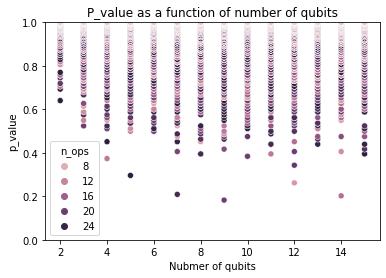

In [16]:
sns.scatterplot(
    data=df_all,
    y="p_value",
    x="n_qubits",
    hue="n_ops"
)
plt.ylim((0,1))
plt.xlabel("Nubmer of qubits")
plt.title("P_value as a function of number of qubits")

Text(0.5, 1.0, 'P_value as a function of number of gates')

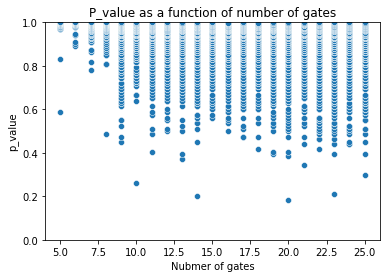

In [17]:
sns.scatterplot(
    data=df_all,
    y="p_value",
    x="n_ops"
)
plt.ylim((0,1))
plt.xlabel("Nubmer of gates")
plt.title("P_value as a function of number of gates")

## Close-up: is out p_value uniformly distributed?
https://stats.stackexchange.com/questions/10613/why-are-p-values-uniformly-distributed-under-the-null-hypothesis

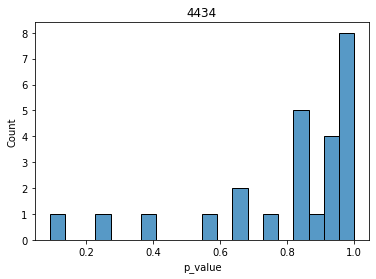

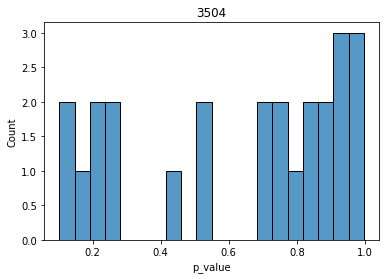

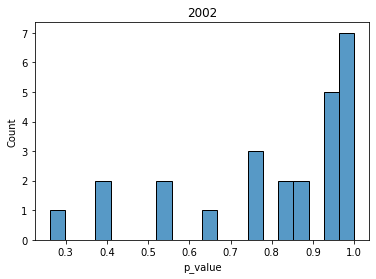

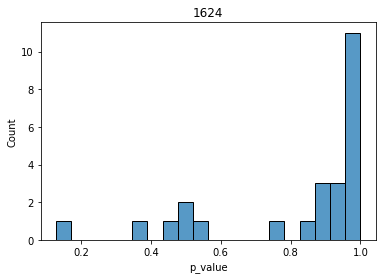

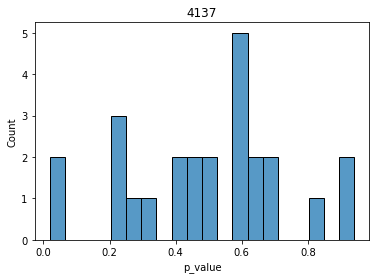

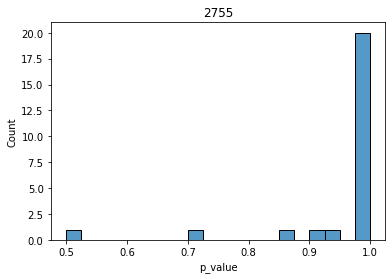

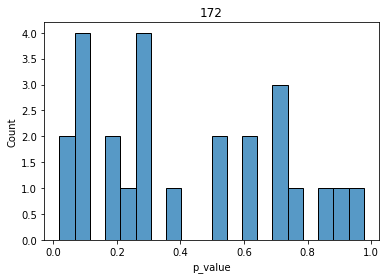

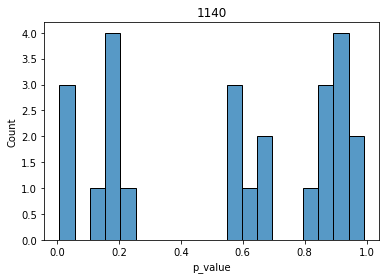

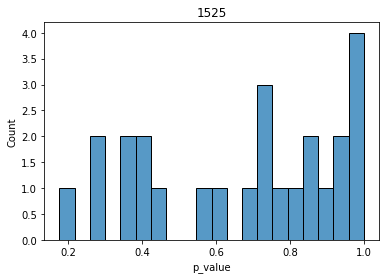

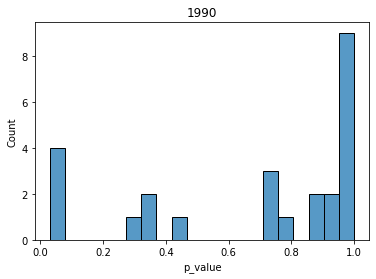

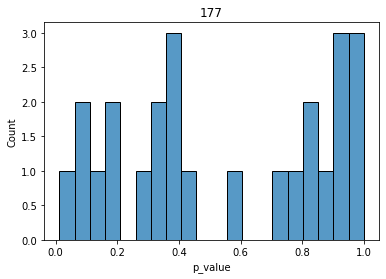

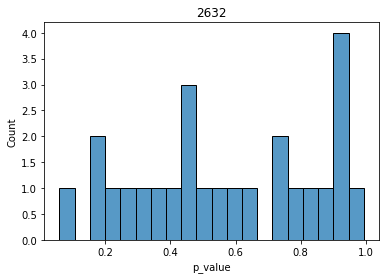

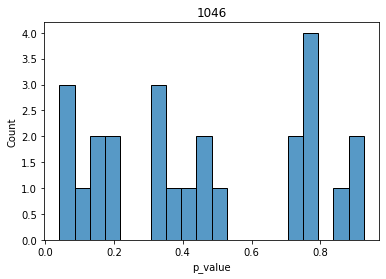

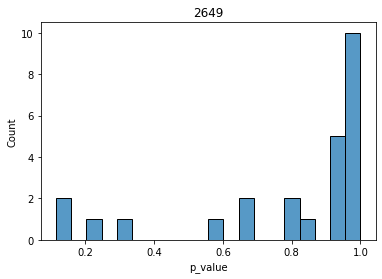

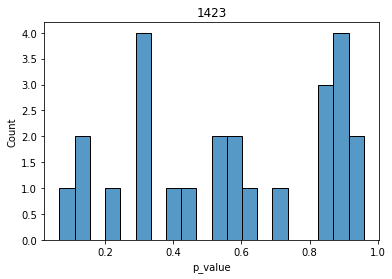

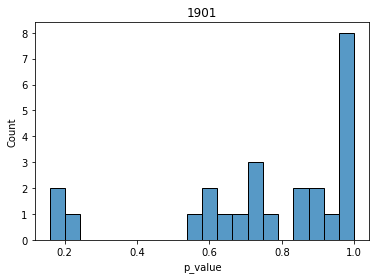

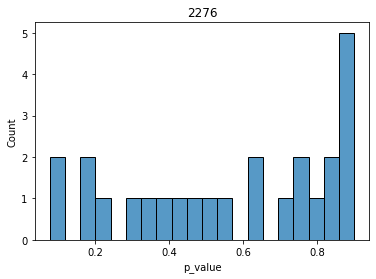

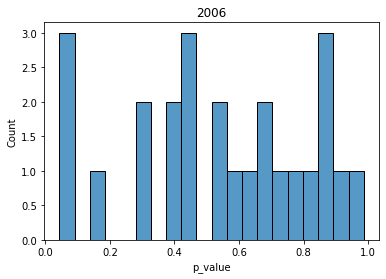

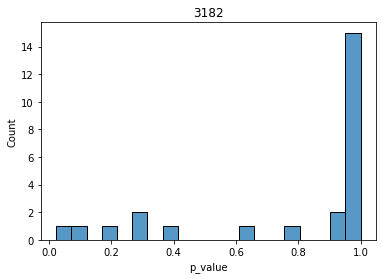

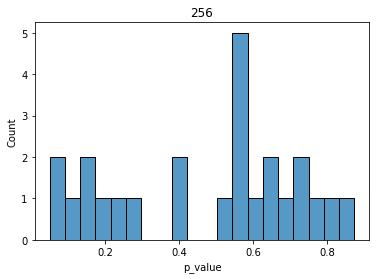

In [78]:
N_SAMPLES = 20
for i in np.random.choice(5000, N_SAMPLES):
    ID_TO_INSPECT = i
    df_single_circuit = df_detector_results[
        df_detector_results['circuit_id'] == str(ID_TO_INSPECT)
    ]
    sns.histplot(
        df_single_circuit,
        x="p_value",
        bins=20
    )
    plt.title(i)
    plt.show()


## Explore comparison with 40k shots 

In [18]:
compilers = config["comparisons"][0]["compilers"]
compilers_names = [e['name'] for e in compilers]
compilers_names

['qiskit', 'cirq']

In [19]:
all_records = []

for i_compiler in compilers_names:
    i_records = read_execution_folder(
        folder_with_execs=FOLDER_EXECUTIONS, 
        compiler_name=i_compiler)
    all_records.extend(i_records)

df_all = pd.DataFrame.from_records(all_records)
df_cirq = df_all[df_all["compiler_name"] == "cirq"].groupby(
    by=["compiler_name", "program_id"]).agg({"filepath": list}).reset_index()
df_qiskit = df_all[df_all["compiler_name"] == "qiskit"].groupby(
    by=["compiler_name", "program_id"]).agg({"filepath": list}).reset_index()


In [20]:
df_cirq.head()

,compiler_name,program_id,filepath
0,cirq,0,[../data/experiment_v08/cross_platform/executi...
1,cirq,1,[../data/experiment_v08/cross_platform/executi...
2,cirq,10,[../data/experiment_v08/cross_platform/executi...
3,cirq,100,[../data/experiment_v08/cross_platform/executi...
4,cirq,1000,[../data/experiment_v08/cross_platform/executi...


In [21]:
df_comparisons = pd.merge(
    left=df_cirq.drop(columns=['compiler_name']),
    right=df_qiskit.drop(columns=['compiler_name']), 
    on='program_id',
    suffixes=("_cirq", "_qiskit")
)
df_comparisons.head()

,program_id,filepath_cirq,filepath_qiskit
0,0,[../data/experiment_v08/cross_platform/executi...,[../data/experiment_v08/cross_platform/executi...
1,1,[../data/experiment_v08/cross_platform/executi...,[../data/experiment_v08/cross_platform/executi...
2,10,[../data/experiment_v08/cross_platform/executi...,[../data/experiment_v08/cross_platform/executi...
3,100,[../data/experiment_v08/cross_platform/executi...,[../data/experiment_v08/cross_platform/executi...
4,1000,[../data/experiment_v08/cross_platform/executi...,[../data/experiment_v08/cross_platform/executi...


In [22]:
example_list = df_cirq.iloc[0]['filepath']
example_list

['../data/experiment_v08/cross_platform/executions/cirq/0_4.json',
 '../data/experiment_v08/cross_platform/executions/cirq/0_3.json',
 '../data/experiment_v08/cross_platform/executions/cirq/0_0.json',
 '../data/experiment_v08/cross_platform/executions/cirq/0_1.json',
 '../data/experiment_v08/cross_platform/executions/cirq/0_2.json']

In [23]:
example_list = df_comparisons.iloc[0]['filepath_cirq']
example_list

['../data/experiment_v08/cross_platform/executions/cirq/0_4.json',
 '../data/experiment_v08/cross_platform/executions/cirq/0_3.json',
 '../data/experiment_v08/cross_platform/executions/cirq/0_0.json',
 '../data/experiment_v08/cross_platform/executions/cirq/0_1.json',
 '../data/experiment_v08/cross_platform/executions/cirq/0_2.json']

In [24]:
from utils import load_json
from functools import reduce


def join_two_executions(exec_a, exec_b):
    return {
        k: exec_a.get(k, 0) + exec_b.get(k, 0)
        for k in set(exec_a) | set(exec_b)
    }


def read_multiple_execution_as_one(filepath_executions):
    """
    Join all the dictionary result in one.
    
    x = {'both1': 1, 'both2': 2, 'only_x': 100}
    y = {'both1': 10, 'both2': 20, 'only_y': 200}

    print {k: x.get(k, 0) + y.get(k, 0) for k in set(x)}
    print {k: x.get(k, 0) + y.get(k, 0) for k in set(x) & set(y)}
    print {k: x.get(k, 0) + y.get(k, 0) for k in set(x) | set(y)}
    
    Results:

        {'both2': 22, 'only_x': 100, 'both1': 11}
        {'both2': 22, 'both1': 11}
        {'only_y': 200, 'both2': 22, 'both1': 11, 'only_x': 100}
    """
    all_dicts = [
        load_json(
            filename=os.path.basename(filepath), 
            folder=os.path.dirname(filepath))
        for filepath in filepath_executions
    ]
    return reduce(join_two_executions, all_dicts)
    
    
final_shots = read_multiple_execution_as_one(
    filepath_executions=example_list)

In [25]:
final_shots

{'000000101011': 78,
 '000000101000': 27965,
 '000000000010': 1063,
 '000000101001': 272,
 '000000000001': 37,
 '000000000000': 3704,
 '000000101010': 7835,
 '000000000011': 6}

In [26]:
from detectors import KS_Detector

In [27]:
detector = KS_Detector()

In [28]:
# iterate over all pairs

comparison_records = []

for i, row in df_comparisons.iterrows():
    print(i)
    i_record = {
        "program_id": row['program_id']
    }
    res_cirq = read_multiple_execution_as_one(row['filepath_cirq'])
    res_qiskit = read_multiple_execution_as_one(row['filepath_qiskit'])
    stat, p_value = detector.check(res_cirq, res_qiskit)
    i_record['p_value_40k'] = p_value
    i_record['stat_40k'] = stat
    comparison_records.append(i_record)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


In [33]:
df_40k_comparison = pd.DataFrame.from_records(comparison_records)

In [30]:
df_40k_comparison.head()

,program_id,p_value_40k,stat_40k
0,0,0.939535,0.003711
1,1,0.997578,0.002759
2,10,0.999975,0.002173
3,100,0.181858,0.007642
4,1000,0.066557,0.009106


In [31]:
PATH_40K = f"../data/experiment_v{EXPERIMENT_VERSION}/cross_platform/predictions/40k_comparisons.csv"
#df_40k_comparison.to_csv(PATH_40K)
df_40k_comparison = pd.read_csv(PATH_40K)
df_40k_comparison["program_id"] = df_40k_comparison["program_id"].astype(str)

<AxesSubplot:xlabel='p_value_40k', ylabel='Count'>

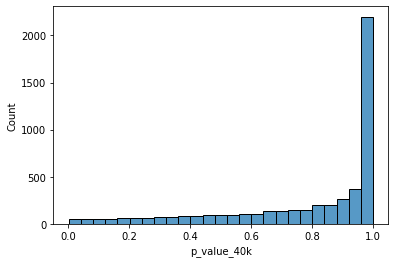

In [32]:
sns.histplot(
    df_40k_comparison,
    x="p_value_40k"
)

## 40kshots vs 25 times 8k

In [37]:
df_40_vs_25times = pd.merge(
    df_25times_8k_comparison,
    df_40k_comparison,
    on="program_id"
)
df_40_vs_25times.head()

,program_id,stat_median_25,p_value_median_25,p_value_40k,stat_40k
0,156,0.017090,0.182654,0.016484,0.010815
1,2734,0.016724,0.202100,0.000990,0.013623
2,1010,0.016602,0.208926,0.032792,0.010010
3,4773,0.015747,0.261730,0.384402,0.006323
4,388,0.015259,0.295988,0.999986,0.002124


In [40]:
df_40_vs_25times_w_info = pd.merge(
    df_40_vs_25times, 
    df_info.rename(columns={"circuit_id": "program_id"}), 
    on="program_id")
df_40_vs_25times_w_info.head()

,program_id,stat_median_25,p_value_median_25,p_value_40k,stat_40k,n_qubits,n_ops,gate_set,strategy_program_generation,benchmark_name
0,156,0.017090,0.182654,0.016484,0.010815,9,20,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
1,2734,0.016724,0.202100,0.000990,0.013623,14,14,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
2,1010,0.016602,0.208926,0.032792,0.010010,7,23,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
3,4773,0.015747,0.261730,0.384402,0.006323,12,10,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform
4,388,0.015259,0.295988,0.999986,0.002124,5,25,"{'cx': 3, 'rx': 1, 'ry': 1, 'rz': 1, 'p': 1}",WeightedRandomCircuitGenerator,cross_platform


In [41]:
print(len(df_40_vs_25times_w_info))

5000


(-0.1, 1.1)

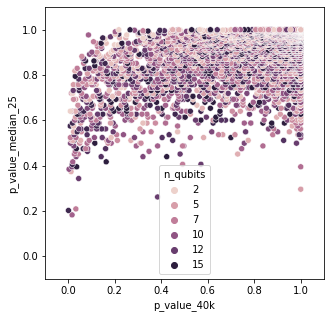

In [42]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    data=df_40_vs_25times_w_info,
    x="p_value_40k",
    y="p_value_median_25",
    hue="n_qubits",
    ax=ax
)
plt.xlim((-.1,1.1))
plt.ylim((-.1,1.1))

(-0.1, 1.1)

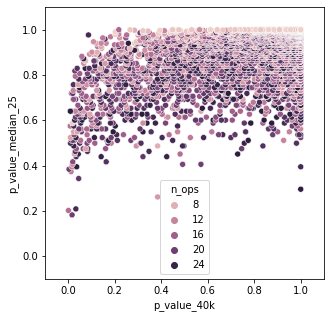

In [43]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(
    data=df_40_vs_25times_w_info,
    x="p_value_40k",
    y="p_value_median_25",
    hue="n_ops",
    ax=ax
)
plt.xlim((-.1,1.1))
plt.ylim((-.1,1.1))

## Most Severe Cases

In [45]:
COLUMNS_TO_INSPECT = ["program_id", "p_value_40k", "p_value_median_25", "n_ops", "n_qubits"]

In [46]:
df_inspection = df_40_vs_25times_w_info[COLUMNS_TO_INSPECT]
# for p_value_median_25
df_inspection.sort_values(by=["p_value_median_25"]).head(10)

,program_id,p_value_40k,p_value_median_25,n_ops,n_qubits
0,156,0.016484,0.182654,20,9
1,2734,0.000990,0.202100,14,14
2,1010,0.032792,0.208926,23,7
3,4773,0.384402,0.261730,10,12
4,388,0.999986,0.295988,25,5
5,1989,0.044903,0.343092,21,12
6,481,0.012116,0.373628,13,4
7,2777,0.003464,0.384178,20,10
11,2422,1.000000,0.394911,23,8
10,1394,0.036225,0.394911,25,15


In [47]:
df_inspection = df_40_vs_25times_w_info[COLUMNS_TO_INSPECT]
# for p_value_40k
df_inspection = df_inspection[df_inspection["p_value_40k"] < .01]
df_inspection.sort_values(by="n_ops").head(20)

,program_id,p_value_40k,p_value_median_25,n_ops,n_qubits
67,4280,0.009235,0.523972,9,7
1,2734,0.000990,0.202100,14,14
115,3951,0.008620,0.574957,14,14
7,2777,0.003464,0.384178,20,10
47,1406,0.009890,0.499159,23,11
249,2761,0.009026,0.640362,25,2


In [48]:
df_inspection = df_40_vs_25times_w_info[COLUMNS_TO_INSPECT]
n_divergent_cases = len(df_inspection[df_inspection["p_value_40k"] < 0.01])
print(f"With the comparison on the 40k shots we have {n_divergent_cases} divergent cases.")

With the comparison on the 40k shots we have 6 divergent cases.


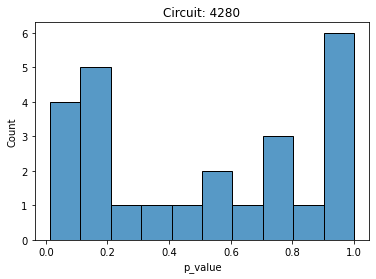

In [49]:
ID_TO_INSPECT = 4280
df_single_circuit = df_detector_results[
    df_detector_results['circuit_id'] == str(ID_TO_INSPECT)
]
sns.histplot(
    df_single_circuit,
    x="p_value",
    bins=10
)
plt.title(f"Circuit: {ID_TO_INSPECT}")
plt.show()

In [53]:
df = df_40_vs_25times_w_info[COLUMNS_TO_INSPECT]
df[df["program_id"] == "10"].head()

,program_id,p_value_40k,p_value_median_25,n_ops,n_qubits
7,10,0.000537,0.153537,196,8
